In [40]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import csv
import datetime
import gensim
import statistics

In [53]:
text = input("Enter your text: ") #she is pretty. he is smart. the dress looked good on her

Enter your text: she is pretty. he is smart. the dress looked good on her


In [57]:
import spacy
import matplotlib.pyplot as plt

nlp = spacy.load('en_core_web_sm')

#extracting subject and object from sentence
def extract_subject_object(sentence):
    sents = nlp(sentence)
    subject = ''
    obj = ''

    for token in sents:
        if 'subj' in token.dep_:
            subject = token.text
        elif 'obj' in token.dep_:
            obj = token.text

    return subject, obj

# counting occurences of certain words in each linguistic category
def count_language_category(sentences, category_keywords):
    count = 0

    for sentence in sentences:
        for word in category_keywords:
            if word in sentence.lower():
                count += 1
                break

    return count

def analyze_text(paragraph):
    doc = nlp(paragraph)
    female_sentences = []
    male_sentences = []

    # LIWC categories
    objectifying_language = {'sexy', 'attractive', 'ugly', 'fat', 'chubby', 'makeup', 'dress', 'curvy', 'whimsical', 'diet', 'busty', 'smile', 'clothing', 'fashion', 'outfit', 'lips', 'beauty', 'model', 'swimwear', 'gorgeous', 'posterior', 'temptress', 'weight', 'hair', 'bra', 'underwear', 'romantic', 'erotic', 'charming', 'healthy', 'stylish', 'provocative', 'skinny', 'obese', 'manicures', 'slut', 'whore', 'cute', 'shaving', 'trendy', 'prepubescent', 'cheeky', 'clothes', 'seductive', 'elegant', 'glamorous', 'dresses', 'desirable', 'appealing', 'exotic', 'facelift', 'plastic surgery', 'botox', 'unattractive', 'alluring', 'feminine', 'good-looking', 'modeling', 'remarkable', 'supermodel', 'blouse', 'bikini', 'hot', 'young', 'trashy', 'waist', 'blonde', 'brunette', 'hair', 'pretty', 'bra', 'underwear', 'panties'}
    success_language = {'success', 'achieve', 'accomplish', 'victory', 'win', 'triumph', 'goals', 'ambition', 'progress', 'victorious', 'accomplishment', 'persistence', 'perseverance', 'fulfillment', 'prosperity', 'advance', 'advancement', 'conquer', 'mastery', 'attain', 'thriving', 'excellence', 'achievement', 'triumphant', 'thriving', 'prosperous', 'victor', 'champion', 'succeed', 'winner', 'aspiration', 'realize', 'attainment', 'conquest', 'thrive', 'victorious', 'successes', 'successful', 'triumphal', 'advance', 'victories', 'realization', 'breakthrough', 'accomplishments', 'prosper', 'fulfill', 'master', 'achiever', 'progression', 'advance', 'rising', 'top', 'satisfying', 'fulfilled', 'realizing', 'growth', 'satisfactory', 'fulfilling', 'attained', 'prospered', 'realized', 'realizes', 'progressing', 'conquered', 'thrives', 'successful', 'accomplished', 'breakthroughs', 'mastery', 'advancements', 'triumphs', 'succeeds', 'victoriously', 'achievements', 'aspirations', 'masteries', 'victories', 'prosperity', 'realizations', 'fulfillments', 'attainments', 'conquests'}
    smartness_language = {'intelligence', 'smart', 'knowledge', 'wise', 'clever', 'intellect', 'genius', 'bright', 'brainy', 'learned', 'brilliant', 'astute', 'perceptive', 'sage', 'savvy', 'shrewd', 'erudite', 'cunning', 'perceptive', 'insightful', 'sharp', 'intelligent', 'intellectual', 'acumen', 'aptitude', 'cognition', 'cognitive', 'reasoning', 'wisdom', 'sophisticated', 'analytical', 'brainpower', 'logical', 'foresight', 'discerning', 'perception', 'comprehension', 'mindful', 'knowing', 'expertise'}
    kindness_docility_language = {'kind', 'gentle', 'compassion', 'humility', 'tenderness', 'patience', 'sympathy', 'considerate', 'courtesy', 'empathy', 'tolerance', 'compliant', 'complaisant', 'agreeable', 'amicable', 'submissive', 'mildness', 'good-hearted', 'benevolence', 'calmness', 'softness', 'peacefulness', 'sweetness', 'affability', 'gentle-hearted', 'cordial', 'charitable', 'agreeableness', 'meekness', 'pliability', 'docility', 'pliant', 'obedient', 'malleable', 'pliant', 'pliantness', 'manageable', 'tractable', 'mild', 'yielding', 'docile'}

    for sent in doc.sents:
        subject, obj = extract_subject_object(sent.text)
        
        pronouns_women = {'she', 'her', 'hers', 'herself'}
        pronouns_men = {'he', 'him', 'his', 'himself'}
        subject_words = set(subject.lower().split())
        obj_words = set(obj.lower().split())

        if any(pronoun in pronouns_women for pronoun in subject_words.union(obj_words)):
            female_sentences.append(sent.text)
        elif any(pronoun in pronouns_men for pronoun in subject_words.union(obj_words)):
            male_sentences.append(sent.text)

    objectifying_female = count_language_category(female_sentences, objectifying_language)
    objectifying_male = count_language_category(male_sentences, objectifying_language)

    success_female = count_language_category(female_sentences, success_language)
    success_male = count_language_category(male_sentences, success_language)

    smartness_female = count_language_category(female_sentences, smartness_language)
    smartness_male = count_language_category(male_sentences, smartness_language)

    kindness_docility_female = count_language_category(female_sentences, kindness_docility_language)
    kindness_docility_male = count_language_category(male_sentences, kindness_docility_language)

    return (
        len(female_sentences),
        len(male_sentences),
        objectifying_female,
        objectifying_male,
        success_female,
        success_male,
        smartness_female,
        smartness_male,
        kindness_docility_female,
        kindness_docility_male,
    )



Female Sentences: 2
Male Sentences: 1

Objectifying Language - Female Sentences: 2
Objectifying Language - Male Sentences: 0

Success and Achievement Language - Female Sentences: 0
Success and Achievement Language - Male Sentences: 0

Smartness Language - Female Sentences: 0
Smartness Language - Male Sentences: 1

Kindness and Docility Language - Female Sentences: 0
Kindness and Docility Language - Male Sentences: 0


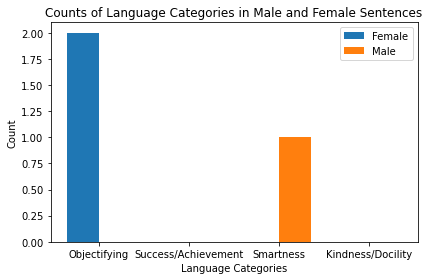

In [58]:
#old
(
    female_sentences_count,
    male_sentences_count,
    objectifying_female_count,
    objectifying_male_count,
    success_female_count,
    success_male_count,
    smartness_female_count,
    smartness_male_count,
    kindness_docility_female_count,
    kindness_docility_male_count,
) = analyze_text(text)


print("Female Sentences:", female_sentences_count)
print("Male Sentences:", male_sentences_count)

print("\nObjectifying Language - Female Sentences:", objectifying_female_count)
print("Objectifying Language - Male Sentences:", objectifying_male_count)

print("\nSuccess and Achievement Language - Female Sentences:", success_female_count)
print("Success and Achievement Language - Male Sentences:", success_male_count)

print("\nSmartness Language - Female Sentences:", smartness_female_count)
print("Smartness Language - Male Sentences:", smartness_male_count)

print("\nKindness and Docility Language - Female Sentences:", kindness_docility_female_count)
print("Kindness and Docility Language - Male Sentences:", kindness_docility_male_count)


categories = ['Objectifying', 'Success/Achievement', 'Smartness', 'Kindness/Docility']
female_counts = [objectifying_female_count, success_female_count, smartness_female_count, kindness_docility_female_count]
male_counts = [objectifying_male_count, success_male_count, smartness_male_count, kindness_docility_male_count]

# plot
bar_width = 0.35
index = range(len(categories))

fig, ax = plt.subplots()
bar1 = ax.bar(index, female_counts, bar_width, label='Female')
bar2 = ax.bar([i + bar_width for i in index], male_counts, bar_width, label='Male')

ax.set_xlabel('Language Categories')
ax.set_ylabel('Count')
ax.set_title('Counts of Language Categories in Male and Female Sentences')
ax.set_xticks([i + bar_width/2 for i in index])
ax.set_xticklabels(categories)
ax.legend()

plt.tight_layout()
plt.show()
